In [1]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem import Descriptors as de
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import rdDepictor
from rdkit.Chem import rdMolEnumerator

In [ ]:
pv1 = Chem.MolFromMolBlock('''
  Mrv2007 06232015292D          

  0  0  0     0  0            999 V3000
M  V30 BEGIN CTAB
M  V30 COUNTS 9 8 0 0 0
M  V30 BEGIN ATOM
M  V30 1 C -1.7083 2.415 0 0
M  V30 2 C -3.042 1.645 0 0
M  V30 3 C -3.042 0.105 0 0
M  V30 4 N -1.7083 -0.665 0 0
M  V30 5 C -0.3747 0.105 0 0
M  V30 6 C -0.3747 1.645 0 0
M  V30 7 * -0.8192 1.3883 0 0
M  V30 8 O -0.8192 3.6983 0 0
M  V30 9 C 0.5145 4.4683 0 0
M  V30 END ATOM
M  V30 BEGIN BOND
M  V30 1 1 1 2
M  V30 2 2 2 3
M  V30 3 1 3 4
M  V30 4 2 4 5
M  V30 5 1 5 6
M  V30 6 2 1 6
M  V30 7 1 7 8 ENDPTS=(3 1 5 6) ATTACH=ANY
M  V30 8 1 8 9
M  V30 END BOND
M  V30 END CTAB
M  END''')
pv1

pv1_bundle = rdMolEnumerator.Enumerate(pv1)

Draw.MolsToGridImage(pv1_bundle)

# Molecular enumeration 

Here, the input V3000 mol-file has a chain variation from MarvinSketch. The code enumerates all different kinds of possibilities 



In [ ]:
#Import file as mol-file V3000

Test_molecule = Chem.MolFromMolBlock('''
Mrv2211 05092220482D          

  0  0  0     0  0            999 V3000
M  V30 BEGIN CTAB
M  V30 COUNTS 15 12 0 0 0
M  V30 BEGIN ATOM
M  V30 1 C -2.5833 2.3317 0 0
M  V30 2 C -3.917 1.5617 0 0
M  V30 3 C -3.917 0.0216 0 0
M  V30 4 C -2.5833 -0.7484 0 0
M  V30 5 C -1.2497 0.0216 0 0
M  V30 6 C -1.2497 1.5617 0 0
M  V30 7 C -5.2507 -0.7483 0 0
M  V30 8 R# -5.2507 -2.2883 0 0 RGROUPS=(1 2)
M  V30 9 C -6.5844 0.0217 0 0
M  V30 10 * -2.3611 1.4333 0 0
M  V30 11 Cl -4.3616 2.5883 0 0
M  V30 12 * -2.3166 0.9457 0 0
M  V30 13 Br -0.3161 2.1007 0 0
M  V30 14 * -2.6083 0.404 0 0
M  V30 15 R# -0.6077 -0.751 0 0 RGROUPS=(1 0)
M  V30 END ATOM
M  V30 BEGIN BOND
M  V30 1 1 1 2
M  V30 2 2 2 3
M  V30 3 1 3 4
M  V30 4 2 4 5
M  V30 5 1 5 6
M  V30 6 2 1 6
M  V30 7 1 3 7
M  V30 8 1 7 8
M  V30 9 1 7 9
M  V30 10 1 10 11 ENDPTS=(5 1 6 2 5 4) ATTACH=ANY
M  V30 11 1 12 13 ENDPTS=(5 1 2 6 5 4) ATTACH=ANY
M  V30 12 1 14 15 ENDPTS=(5 2 1 6 5 4) ATTACH=ANY
M  V30 END BOND
M  V30 END CTAB
M  END''')
#print(Chem.MolToMolBlock(Test_molecule))
Test_molecule

In [ ]:
testmol_2 = Chem.MolFromMolFile('/home/robin/Documents/Learning programming/RDkit/testfile-2.mol')
testmol_2

testmol_enum = rdMolEnumerator.Enumerate(testmol_2)
testmol_enum

# Test to learn chain enumeration 

The smile input can have a R-abbrev and when read and enumerated, it automatically knows what position to enumerate.

In [ ]:
molecule_test = Chem.MolFromSmiles('[*]C1=CC=CC=C1')
Draw.MolToImage(molecule_test)
chains = ['OCC','CC','CCC','CCCC','CCCCC','CCCCCC']
chainMols = [Chem.MolFromSmiles(chain) for chain in chains]

product_smi = []
for chainMol in chainMols:
    product_mol = Chem.ReplaceSubstructs(molecule_test,Chem.MolFromSmarts('[#0]'),chainMol)
    product_smi.append(Chem.MolToSmiles(product_mol[0]))
print(product_smi)
Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in product_smi])

## Test if it is possible to use a regi-enumerated molecule as input in the chain enumeration

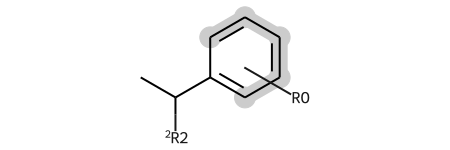

In [12]:
#Instead of writing the whole molecule into the Notebook, just import the file
test_1 = Chem.MolFromMolFile('/home/robin/Documents/Learning programming/RDkit/Test-molecule.mol')
test_1

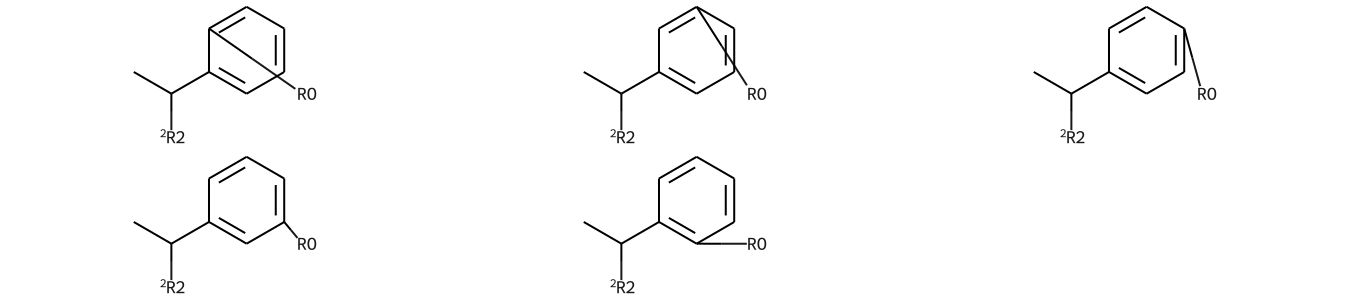

In [13]:
test_molecule_enumerated_2 = rdMolEnumerator.Enumerate(test_1)
test_molecule_enumerated_2

In [ ]:
#This fuction can be skipped if enumeration is to be done on the imported molecules
from rdkit.Chem import rdFMCS
def align_bundle_coords(bndl):
    ps = rdFMCS.MCSParameters()
    for m in bndl:
        Chem.SanitizeMol(m)
    mcs = rdFMCS.FindMCS(bndl,completeRingsOnly=True)
    q = Chem.MolFromSmarts(mcs.smartsString)
    rdDepictor.Compute2DCoords(q)
    for m in bndl:
        rdDepictor.GenerateDepictionMatching2DStructure(m,q)

In [ ]:
#Not nesseccery to call the function if the input molecules are to be chain enumerated. 
#Call the function if only regio-enumeration should be viewd
align_bundle_coords(test_molecule_enumerated_2)
Draw.MolsToGridImage(test_molecule_enumerated_2)

output = []
for mol in test_molecule_enumerated_2:
    Chem.MolToSmiles(mol)
    output.append(mol)
output

### Side chain enumeration

Here, the regio-enumerated molecules from above are side chain enumerated to give a large molecular library.

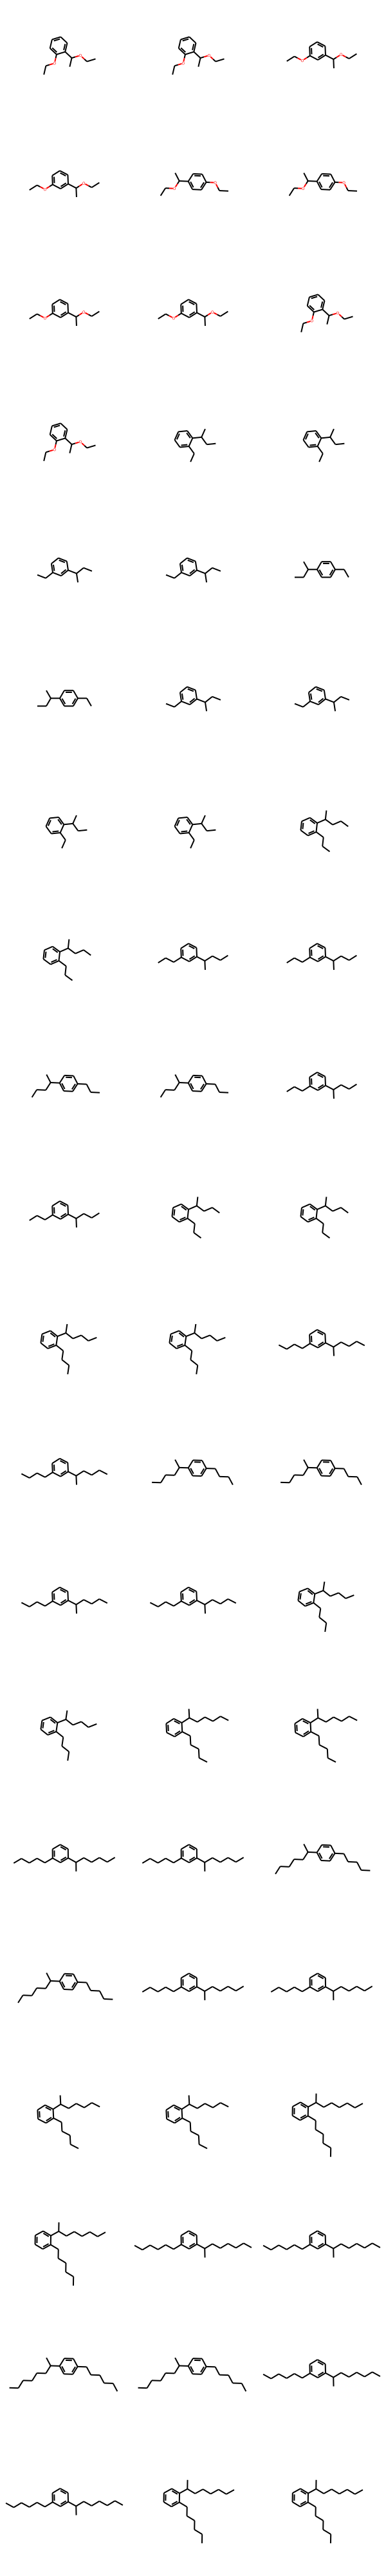

In [39]:
chains = ['OCC','CC','CCC','CCCC','CCCCC','CCCCCC']
chainMols = [Chem.MolFromSmiles(chain) for chain in chains]

product_smi = []
for chainMol in chainMols:
    for mol in test_molecule_enumerated_2:
        product_mol = Chem.ReplaceSubstructs(mol,Chem.MolFromSmarts('[#0]'),chainMol)
        for mol in product_mol:
            product_mol_2 = Chem.ReplaceSubstructs(mol,Chem.MolFromSmarts('[#0]'),chainMol)
            product_smi.append(Chem.MolToSmiles(product_mol_2[0]))
Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in product_smi], maxMols=999999)



# Lipinski rules

The Lipinski rules of five, https://en.wikipedia.org/wiki/Lipinski%27s_rule_of_five, are here used on the generated data set to sort out potential drug candidates.

In [7]:
from rdkit.Chem import Lipinski as lip
from rdkit.Chem import Crippen as cr
from rdkit.Chem import rdmolfiles as rdfiles


In [ ]:
#This is only here to play arounbd with different molecules to learn how to use the filter function

m = Chem.MolFromSmiles('c1ccccc1[N+](=O)[O-]') #Write input as smiles

a = Chem.MolFromSmiles('C1=CC=CC=C1 ')

c = Chem.MolFromSmiles('O=C1NC(=O)NC=C1C')
taxol = Chem.MolFromSmiles('CC1=C2[C@H](C(=O)[C@@]3([C@H](C[C@@H]4[C@]([C@H]3[C@@H]([C@@](C2(C)C)(C[C@@H]1OC(=O)[C@@H]([C@H](c5ccccc5)NC(=O)c6ccccc6)O)O)OC(=O)c7ccccc7)(CO4)OC(=O)C)O)C)OC(=O)C')
b = a, m, c, taxol
b

anisol = Chem.MolFromMolFile('Anisol.mol') #Import the file as a .mol file
anisol_nondef = Chem.MolFromMolFile('Anisol_2.mol')

 ### Here, the module is used to calculate chemical features

    de.ExactMolWt() Calculates the exact molar mass of the molecule
    lip.NumHAcceptors() Calculates the hydrogen bond acceptors
    lip.NumHDonors() Calculates the number of hydrogen bond donors
    cr.MolLogP() Caluclates the logP value
    

In [8]:
passed_molecules = []
testlist = []

for i in b: 
    '''Set the target molecular weight of the dataset'''
    if de.ExactMolWt(i) < 1500: #Set the Mw cut off value
        #passed_molecules.append(i)
        '''Set the numer of hydrogen bond acceptors'''
        if 0 < lip.NumHAcceptors(i) <= 18: #Set the value of hydrogen bond acceptors cut off values
            '''Set the number of hydrogen bond donors'''
            if 0 <= lip.NumHDonors(i) <= 50: #Set the value of hydrogen bond acceptor cut off values
                '''Calculate logP by setting the values'''
                if 0<= cr.MolLogP(i) <= 5:
                    passed_molecules.append(i)


#for features in passed_molecules:
    

logP_list = []
for logP in passed_molecules:
    logp = cr.MolLogP(logP)
    logP_list.append(logp)
    
print(logP_list)


molecular_weight = []
for mol in passed_molecules:
    weight = de.ExactMolWt(mol)
    molecular_weight.append(weight)
    
print(molecular_weight)

[1.5947999999999998, 3.735700000000004]
[123.0320284, 853.3309553120001]


# Import large number of molecules
    
Using 
    
    rdfolfiles.SmilesMolSupplier() 
    
it is possible to import a large number of molecules in a .smi file from eg ChemDraw or Maestro for further evaluation

In [ ]:
#Insert the same of the .smi file located in the root directory

RE7_enumerated = rdfiles.SmilesMolSupplier('Test_export.smi')

img_import = Draw.MolsToGridImage(RE7_enumerated, molsPerRow = 4, subImgSize = (300,300), legends=[x.GetProp("_Name") for x in RE7_enumerated])
img_import

In [ ]:
passed_molecules_largedata = []
testlist = []

for i in RE7_enumerated: #Input the name of the data set read in previous cell
    '''Set the target molecular weight of the dataset'''
    if de.ExactMolWt(i) < 1500: #Set the Mw cut off value
        #passed_molecules.append(i)
        if 0 < lip.NumHAcceptors(i) <= 10: #Set the value of hydrogen bond acceptors cut off values
            if 0 <= lip.NumHDonors(i) <= 5: #Set the value of hydrogen bond acceptor cut off values
                if 0<= cr.MolLogP(i) <= 5:
                    passed_molecules_largedata.append(i)


#for features in passed_molecules:
    

logP_list = []
for logP in passed_molecules_largedata:
    logp = cr.MolLogP(logP)
    logP_list.append(logp)
    
print(logP_list)


molecular_weight = []
for mol in passed_molecules_largedata:
    weight = de.ExactMolWt(mol)
    molecular_weight.append(weight)
    
print(molecular_weight)

In [ ]:
filtered_molecules = Draw.MolsToGridImage(passed_molecules_largedata, molsPerRow=4, legends=)
filtered_molecules

In [ ]:
IPythonConsole.drawOptions.addAtomIndices = True #writes all molecules with atom indecies
IPythonConsole.molSize = 300,300 #Picture size of individual molecules